PREDICTION AND CLASSIFICATION OF AIR QUALITY USING POLLUTION DATA

In [3]:
# Kết nối tới drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Set the path to train and test dataset
df = "/content/drive/My Drive/duLieuDaXuLyWin.csv"
df_win = "/content/drive/My Drive/duLieuDaXuLyWin.csv"

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from datetime import datetime, timedelta
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, KFold, GridSearchCV

In [7]:
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [8]:
df = pd.read_csv(df)
df.head(10)

,Unnamed: 0,Date,Year,Month,Day,State,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Average_AQI,O3 Mean Smoothed,CO Mean Smoothed,SO2 Mean Smoothed,NO2 Mean Smoothed
0,0,2000-01-01,2000,1,1,Arizona,Phoenix,0.189443,0.040,10.0,...,13.0,0.162933,49.0,19.0,46.0,30.25,0.152677,0.184037,0.019297,0.209023
1,1,2000-01-02,2000,1,2,Arizona,Phoenix,0.153509,0.032,10.0,...,4.0,0.189893,36.0,19.0,34.0,23.50,0.145821,0.187117,0.020883,0.220754
2,2,2000-01-03,2000,1,3,Arizona,Phoenix,0.093088,0.016,9.0,...,16.0,0.279663,51.0,8.0,48.0,26.75,0.135750,0.191645,0.023571,0.238021
3,3,2000-01-04,2000,1,4,Arizona,Phoenix,0.153509,0.033,9.0,...,23.0,0.279663,59.0,8.0,56.0,40.00,0.126849,0.195708,0.026555,0.252627
4,4,2000-01-05,2000,1,5,Arizona,Phoenix,0.074580,0.012,9.0,...,21.0,0.279663,59.0,22.0,56.0,33.00,0.121399,0.198339,0.029075,0.259315
5,5,2000-01-06,2000,1,6,Arizona,Phoenix,0.136092,0.025,10.0,...,24.0,0.279663,59.0,8.0,56.0,39.75,0.118897,0.199632,0.030779,0.258053
6,6,2000-01-07,2000,1,7,Arizona,Phoenix,0.129013,0.024,10.0,...,30.0,0.235782,43.0,9.0,41.0,33.25,0.117239,0.200126,0.031792,0.253042
7,7,2000-01-08,2000,1,8,Arizona,Phoenix,0.109958,0.020,10.0,...,26.0,0.236068,41.0,0.0,39.0,35.25,0.114448,0.200273,0.032494,0.249757
8,8,2000-01-09,2000,1,9,Arizona,Phoenix,0.123025,0.022,10.0,...,19.0,0.204520,37.0,20.0,35.0,26.50,0.109804,0.200308,0.033231,0.251643
9,9,2000-01-10,2000,1,10,Arizona,Phoenix,0.099076,0.015,9.0,...,30.0,0.279663,59.0,20.0,56.0,38.50,0.103959,0.200314,0.034106,0.258313


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         608699 non-null  int64  
 1   Date               608699 non-null  object 
 2   Year               608699 non-null  int64  
 3   Month              608699 non-null  int64  
 4   Day                608699 non-null  int64  
 5   State              608699 non-null  object 
 6   City               608699 non-null  object 
 7   O3 Mean            608699 non-null  float64
 8   O3 1st Max Value   608699 non-null  float64
 9   O3 1st Max Hour    608699 non-null  float64
 10  O3 AQI             608699 non-null  float64
 11  CO Mean            608699 non-null  float64
 12  CO 1st Max Value   608699 non-null  float64
 13  CO 1st Max Hour    608699 non-null  float64
 14  CO AQI             608699 non-null  float64
 15  SO2 Mean           608699 non-null  float64
 16  SO

In [10]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [11]:
def correlation(dataset, threshold):
    col_corr = []  # Use a list instead of a set
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr

In [12]:
corr = 0.7

Length of corr_feature equal: 12


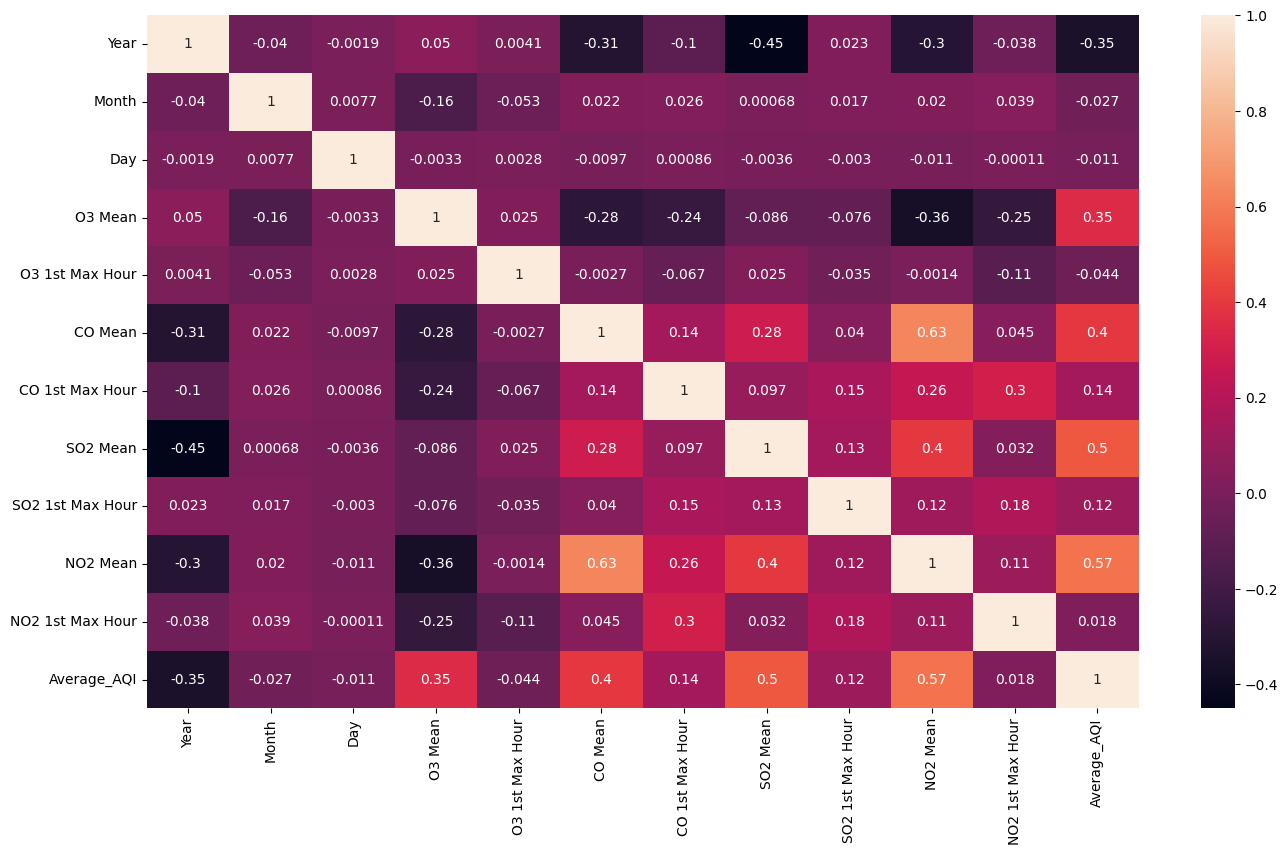

In [13]:
# Create a copy of the original dataframe
df1 = df.copy()

# Select features with correlation equal to or greater than a certain value
corr_features = correlation(df1, corr)

# Print the number of features selected
print("Length of corr_feature equal: {0}".format(len(set(corr_features))))

# Drop the selected features from the dataframe
df1 = df1.drop(corr_features, axis = 1)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(method='pearson'), annot=True)

# Show the heatmap
plt.show()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              608699 non-null  object 
 1   Year              608699 non-null  int64  
 2   Month             608699 non-null  int64  
 3   Day               608699 non-null  int64  
 4   State             608699 non-null  object 
 5   City              608699 non-null  object 
 6   O3 Mean           608699 non-null  float64
 7   O3 1st Max Hour   608699 non-null  float64
 8   CO Mean           608699 non-null  float64
 9   CO 1st Max Hour   608699 non-null  float64
 10  SO2 Mean          608699 non-null  float64
 11  SO2 1st Max Hour  608699 non-null  float64
 12  NO2 Mean          608699 non-null  float64
 13  NO2 1st Max Hour  608699 non-null  float64
 14  Average_AQI       608699 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 69.7+ MB


In [15]:
df1.head(10)

,Date,Year,Month,Day,State,City,O3 Mean,O3 1st Max Hour,CO Mean,CO 1st Max Hour,SO2 Mean,SO2 1st Max Hour,NO2 Mean,NO2 1st Max Hour,Average_AQI
0,2000-01-01,2000,1,1,Arizona,Phoenix,0.189443,10.0,0.165678,23.0,0.016994,21.0,0.162933,19.0,30.25
1,2000-01-02,2000,1,2,Arizona,Phoenix,0.153509,10.0,0.189303,0.0,0.013780,22.0,0.189893,19.0,23.50
2,2000-01-03,2000,1,3,Arizona,Phoenix,0.093088,9.0,0.200315,8.0,0.023936,19.0,0.279663,8.0,26.75
3,2000-01-04,2000,1,4,Arizona,Phoenix,0.153509,9.0,0.200315,23.0,0.029592,8.0,0.279663,8.0,40.00
4,2000-01-05,2000,1,5,Arizona,Phoenix,0.074580,9.0,0.200315,2.0,0.034605,7.0,0.279663,22.0,33.00
5,2000-01-06,2000,1,6,Arizona,Phoenix,0.136092,10.0,0.200315,9.0,0.028600,7.0,0.279663,8.0,39.75
6,2000-01-07,2000,1,7,Arizona,Phoenix,0.129013,10.0,0.200315,23.0,0.034477,7.0,0.235782,9.0,33.25
7,2000-01-08,2000,1,8,Arizona,Phoenix,0.109958,10.0,0.200315,2.0,0.033191,0.0,0.236068,0.0,35.25
8,2000-01-09,2000,1,9,Arizona,Phoenix,0.123025,10.0,0.200315,2.0,0.027792,19.0,0.204520,20.0,26.50
9,2000-01-10,2000,1,10,Arizona,Phoenix,0.099076,9.0,0.200315,23.0,0.036405,20.0,0.279663,20.0,38.50


In [16]:
df1.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Hour,CO Mean,CO 1st Max Hour,SO2 Mean,SO2 1st Max Hour,NO2 Mean,NO2 1st Max Hour,Average_AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.269458,10.754388,0.096529,5.971042,0.012197,8.851891,0.111744,11.606845,18.045713
std,6.122558,3.310633,8.806949,0.109665,3.239750,0.030680,7.739380,0.006208,6.774720,0.058983,7.881014,8.429109
min,2000.000000,1.000000,1.000000,0.056617,7.000000,0.055060,0.000000,0.007680,0.000000,0.035087,0.000000,0.250000
25%,2006.000000,4.000000,8.000000,0.188351,9.000000,0.077609,0.000000,0.008317,3.000000,0.066131,5.000000,12.250000
50%,2012.000000,7.000000,16.000000,0.267826,10.000000,0.088096,2.000000,0.009795,8.000000,0.097542,9.000000,16.250000
75%,2016.000000,9.000000,23.000000,0.346764,11.000000,0.108023,9.000000,0.013208,13.000000,0.144092,20.000000,21.500000
max,2021.000000,12.000000,31.000000,0.511156,22.000000,0.200315,23.000000,0.036405,23.000000,0.279663,23.000000,106.250000


Bài toán 3:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
# Bắt đầu đo thời gian chạy
start_time = time.time()

# Chọn các đặc trưng
features = ['Year', 'Month', 'Day', 'O3 Mean', 'O3 1st Max Hour', 'CO Mean' , 'CO 1st Max Hour', 'SO2 Mean','SO2 1st Max Hour', 'NO2 Mean', 'NO2 1st Max Hour']

# Tạo biến mục tiêu mới 'Air_Quality_State' dựa trên giá trị của 'Average_AQI'
df1['Air_Quality_State'] = pd.cut(df1['Average_AQI'], bins=[0, 50, 100, 150, 200, 300, float('inf')], labels=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])

# Chọn biến mục tiêu
target = 'Air_Quality_State'

# Tách dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

# Mô hình Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Ma trận nhầm lẫn cho mô hình huấn luyện
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Ma trận nhầm lẫn cho mô hình kiểm thử
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nConfusion Matrix (Training):")
print(conf_matrix_train)
print(f"Accuracy (Training): {accuracy_train}")

print("\nConfusion Matrix (Testing):")
print(conf_matrix_test)
print(f"Accuracy (Testing): {accuracy_test}")
# Kết thúc đo thời gian chạy
end_time = time.time()
# Tính thời gian chạy
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")


Confusion Matrix (Training):
[[483042      0      0]
 [     3   3913      0]
 [     0      0      1]]
Accuracy (Training): 0.9999938393170678

Confusion Matrix (Testing):
[[120677    135]
 [   518    410]]
Accuracy (Testing): 0.9946361097420733
Execution Time: 115.08393812179565 seconds


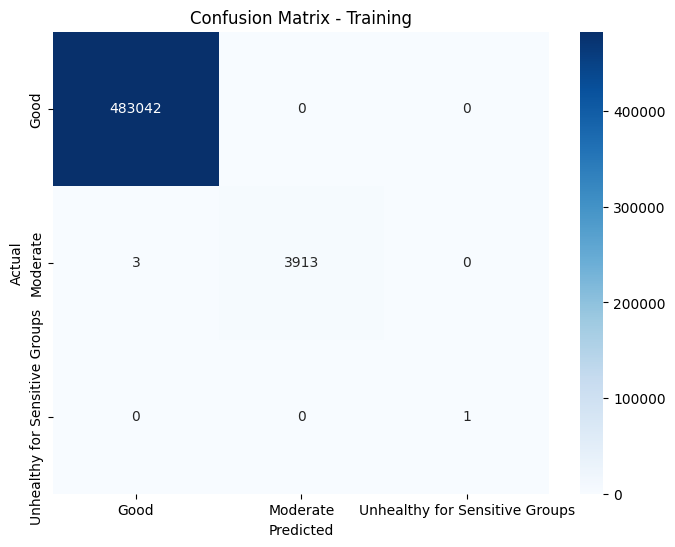

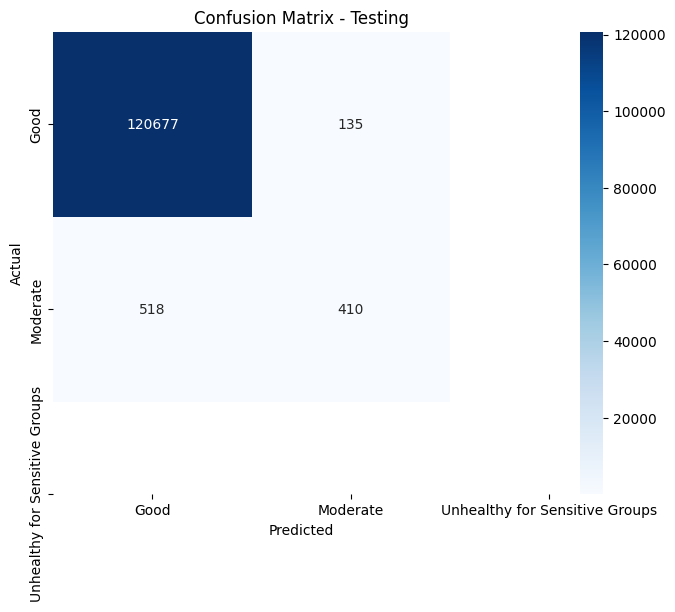

In [ ]:
# Biểu đồ ma trận nhầm lẫn cho tập huấn luyện
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.title("Confusion Matrix - Training")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Biểu đồ ma trận nhầm lẫn cho tập kiểm thử
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.title("Confusion Matrix - Testing")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Correlation Matrix:
           CO Mean  NO2 Mean  SO2 Mean   O3 Mean
CO Mean   1.000000  0.634598  0.284979 -0.279485
NO2 Mean  0.634598  1.000000  0.396024 -0.360756
SO2 Mean  0.284979  0.396024  1.000000 -0.086113
O3 Mean  -0.279485 -0.360756 -0.086113  1.000000


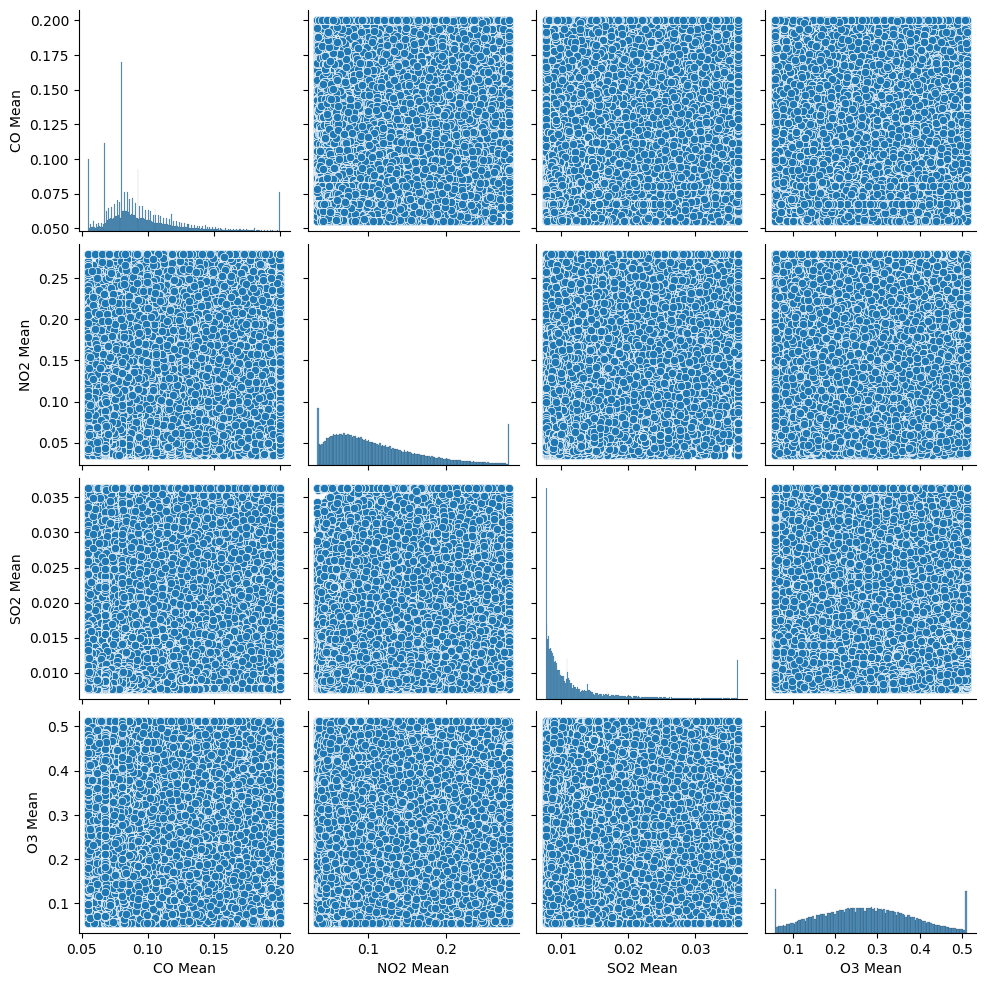

In [ ]:
# Tính toán ma trận tương quan
correlation_matrix = df1[['CO Mean', 'NO2 Mean', 'SO2 Mean', 'O3 Mean']].corr()

# In ma trận tương quan
print("Correlation Matrix:")
print(correlation_matrix)
sns.pairplot(df1[['CO Mean', 'NO2 Mean', 'SO2 Mean', 'O3 Mean']])
plt.show()

Thời gian chạy mô hình Decision Tree: 7.7767744064331055 giây

Feature Importance:
             Feature  Importance
9           NO2 Mean    0.263273
3            O3 Mean    0.192714
7           SO2 Mean    0.117402
5            CO Mean    0.077480
10  NO2 1st Max Hour    0.065417
2                Day    0.055166
0               Year    0.053997
8   SO2 1st Max Hour    0.051936
1              Month    0.050289
6    CO 1st Max Hour    0.040135
4    O3 1st Max Hour    0.032192
Thời gian dự đoán trên tập huấn luyện: 0.08359599113464355 giây
Thời gian dự đoán trên tập kiểm thử: 0.02530670166015625 giây

Confusion Matrix (Training):
[[483042      0      0]
 [     2   3914      0]
 [     0      0      1]]
Accuracy (Training): 0.9999958928780451

Confusion Matrix (Testing):
[[120238    574]
 [   457    471]]
Accuracy (Testing): 0.9915311319204863


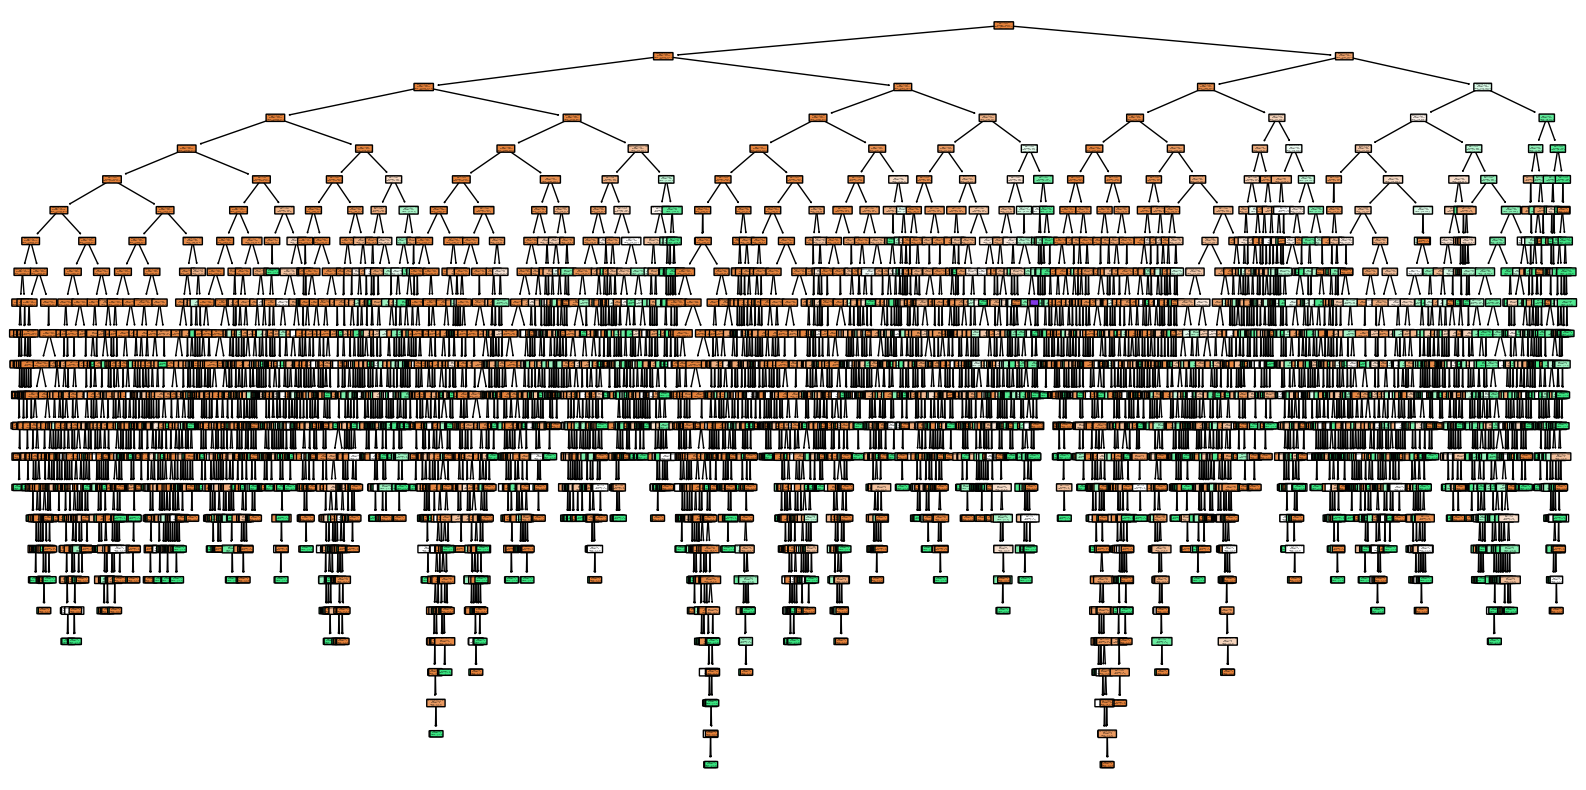

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree


# Chọn các đặc trưng
features = ['Year', 'Month', 'Day', 'O3 Mean', 'O3 1st Max Hour', 'CO Mean', 'CO 1st Max Hour', 'SO2 Mean', 'SO2 1st Max Hour', 'NO2 Mean', 'NO2 1st Max Hour']

# Chọn biến mục tiêu
target = 'Air_Quality_State'

# Tách dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

# Bắt đầu đo thời gian
start_time = time.time()

# Mô hình Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Kết thúc đo thời gian
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Thời gian chạy mô hình Decision Tree: {elapsed_time} giây")

# Tính toán độ quan trọng của các đặc trưng
feature_importances = decision_tree_model.feature_importances_

# Hiển thị tầm quan trọng của các đặc trưng
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Bắt đầu đo thời gian dự đoán trên tập huấn luyện
start_time_train_pred = time.time()

# Dự đoán và tính toán ma trận nhầm lẫn trên tập huấn luyện
y_train_pred = decision_tree_model.predict(X_train)

# Kết thúc đo thời gian dự đoán trên tập huấn luyện
end_time_train_pred = time.time()
elapsed_time_train_pred = end_time_train_pred - start_time_train_pred
print(f"Thời gian dự đoán trên tập huấn luyện: {elapsed_time_train_pred} giây")

# Bắt đầu đo thời gian dự đoán trên tập kiểm thử
start_time_test_pred = time.time()

# Dự đoán và tính toán ma trận nhầm lẫn trên tập kiểm thử
y_test_pred = decision_tree_model.predict(X_test)

# Kết thúc đo thời gian dự đoán trên tập kiểm thử
end_time_test_pred = time.time()
elapsed_time_test_pred = end_time_test_pred - start_time_test_pred
print(f"Thời gian dự đoán trên tập kiểm thử: {elapsed_time_test_pred} giây")

# Tính toán ma trận nhầm lẫn
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nConfusion Matrix (Training):")
print(conf_matrix_train)
print(f"Accuracy (Training): {accuracy_train}")

print("\nConfusion Matrix (Testing):")
print(conf_matrix_test)
print(f"Accuracy (Testing): {accuracy_test}")

# Hiển thị cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=features, class_names=decision_tree_model.classes_, filled=True, rounded=True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

# Chọn các đặc trưng và biến mục tiêu
features = ['CO Mean', 'NO2 Mean', 'O3 Mean', 'SO2 Mean']
target = 'Average_AQI'

# Tách dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
linear_regression_model = LinearRegression()

# Bắt đầu đo thời gian chạy
start_time = time.time()

# Huấn luyện mô hình
linear_regression_model.fit(X_train, y_train)

# Kết thúc đo thời gian chạy
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Thời gian chạy: {elapsed_time} giây")

# Dự đoán trên tập huấn luyện và tập kiểm thử
y_train_pred = linear_regression_model.predict(X_train)
y_test_pred = linear_regression_model.predict(X_test)

# Đánh giá mô hình trên tập huấn luyện
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f"Mean Squared Error (Training): {mse_train}")
print(f"R-squared (Training): {r2_train}")

# Đánh giá mô hình trên tập kiểm thử
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Mean Squared Error (Testing): {mse_test}")
print(f"R-squared (Testing): {r2_test}")


Thời gian chạy: 0.08663058280944824 giây
Mean Squared Error (Training): 17.49896927802696
R-squared (Training): 0.7542375916013443
Mean Squared Error (Testing): 17.171540511337618
R-squared (Testing): 0.7562070647892621


Bài toán 1

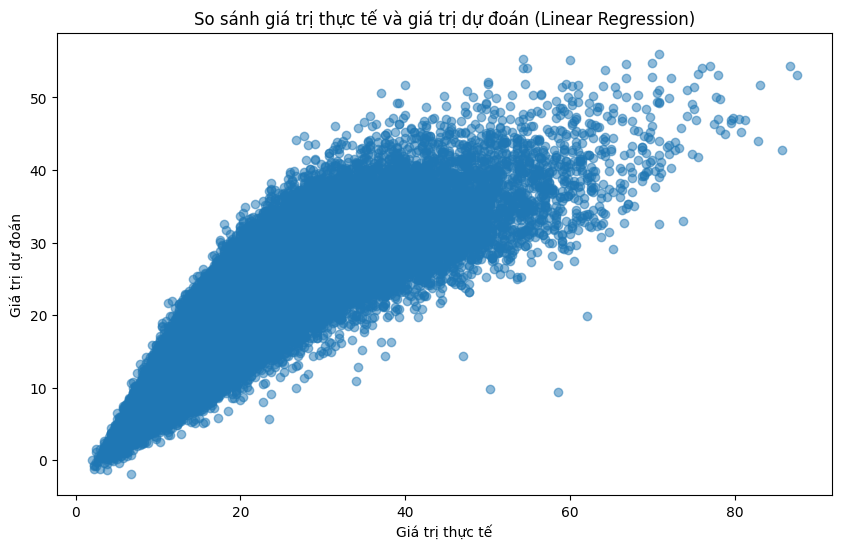

Hệ số: [ 26.03146635  89.95473266  48.51688987 371.86633628]
Độ chệch: -12.127384805894028


In [ ]:
# Biểu đồ dự đoán trên tập kiểm thử
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title('So sánh giá trị thực tế và giá trị dự đoán (Linear Regression)')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.show()
# In ra hệ số và độ chệch của mô hình
print("Hệ số:", linear_regression_model.coef_)
print("Độ chệch:", linear_regression_model.intercept_)

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
# (Assuming df1 is your DataFrame with time series data)
features = ['CO Mean', 'NO2 Mean', 'O3 Mean', 'SO2 Mean']
target = 'Average_AQI'

# Chọn các đặc trưng và biến mục tiêu
data = df1[features + [target]]

# Chuẩn bị dữ liệu cho mô hình LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Tạo dữ liệu chuỗi thời gian
sequence_length = 10  # Độ dài của chuỗi thời gian
sequences = []
next_values = []

for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length, :-1])
    next_values.append(scaled_data[i+sequence_length, -1])

X = np.array(sequences)
y = np.array(next_values)
# Tách dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_time = time.time()

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)
# Kết thúc tính thời gian
end_time = time.time()

# In thời gian chạy
print(f"Thời gian chạy của mô hình là: {end_time - start_time} giây")

# Dự đoán trên tập kiểm thử
y_test_pred = model.predict(X_test)

# Chuyển đổi dữ liệu về giá trị ban đầu để so sánh
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_original = scaler.inverse_transform(y_test_pred)

# Hiển thị biểu đồ dự đoán
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Thực tế')
plt.plot(y_test_pred_original, label='Dự đoán')
plt.title('Dự đoán chất lượng không khí trong tương lai sử dụng LSTM')
plt.xlabel('Thời gian')
plt.ylabel('Average_AQI')
plt.legend()
plt.show()

Epoch 1/50
15218/15218 - 112s - loss: 0.0032 - val_loss: 0.0030 - 112s/epoch - 7ms/step
Epoch 2/50
15218/15218 - 108s - loss: 0.0030 - val_loss: 0.0030 - 108s/epoch - 7ms/step
Epoch 3/50
15218/15218 - 107s - loss: 0.0030 - val_loss: 0.0029 - 107s/epoch - 7ms/step
Epoch 4/50
15218/15218 - 129s - loss: 0.0030 - val_loss: 0.0029 - 129s/epoch - 8ms/step
Epoch 5/50
15218/15218 - 106s - loss: 0.0030 - val_loss: 0.0030 - 106s/epoch - 7ms/step
Epoch 6/50
15218/15218 - 106s - loss: 0.0029 - val_loss: 0.0029 - 106s/epoch - 7ms/step
Epoch 7/50
15218/15218 - 107s - loss: 0.0029 - val_loss: 0.0029 - 107s/epoch - 7ms/step
Epoch 8/50
15218/15218 - 116s - loss: 0.0029 - val_loss: 0.0029 - 116s/epoch - 8ms/step
Epoch 9/50
15218/15218 - 110s - loss: 0.0029 - val_loss: 0.0029 - 110s/epoch - 7ms/step
Epoch 10/50
15218/15218 - 117s - loss: 0.0029 - val_loss: 0.0029 - 117s/epoch - 8ms/step
Epoch 11/50
15218/15218 - 105s - loss: 0.0029 - val_loss: 0.0029 - 105s/epoch - 7ms/step
Epoch 12/50
15218/15218 - 105s

ValueError: ignored

Bài toán 2:

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import time

# Tính thời gian chạy của thuật toán
start_time = time.time()

# Chọn các đặc trưng
features = ['Year', 'Month', 'Day', 'O3 Mean', 'O3 1st Max Hour', 'CO Mean', 'CO 1st Max Hour', 'SO2 Mean', 'SO2 1st Max Hour', 'NO2 Mean', 'NO2 1st Max Hour']

# Tạo biến mục tiêu mới 'Air_Quality_State' dựa trên giá trị của 'Average_AQI'
df1['Air_Quality_State'] = pd.cut(df1['Average_AQI'], bins=[0, 50, 100, 150, 200, 300, float('inf')], labels=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])

# Chọn biến mục tiêu
target = 'Air_Quality_State'

# Tách dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

# Mô hình Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Kết thúc tính thời gian
end_time = time.time()

# In thời gian chạy
print(f"Thời gian chạy của mô hình Random Forest là: {end_time - start_time} giây")

# Ma trận nhầm lẫn cho mô hình huấn luyện
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Ma trận nhầm lẫn cho mô hình kiểm thử
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nConfusion Matrix (Training):")
print(conf_matrix_train)
print(f"Accuracy (Training): {accuracy_train}")

print("\nConfusion Matrix (Testing):")
print(conf_matrix_test)
print(f"Accuracy (Testing): {accuracy_test}")


Thời gian chạy của mô hình Random Forest là: 116.00058794021606 giây

Confusion Matrix (Training):
[[483042      0      0]
 [     3   3913      0]
 [     0      0      1]]
Accuracy (Training): 0.9999938393170678

Confusion Matrix (Testing):
[[120677    135]
 [   520    408]]
Accuracy (Testing): 0.9946196812879908


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import time

# Tính thời gian chạy của thuật toán
start_time = time.time()

# Chọn các đặc trưng
features = ['Year', 'Month', 'Day', 'O3 Mean', 'O3 1st Max Hour', 'CO Mean', 'CO 1st Max Hour', 'SO2 Mean', 'SO2 1st Max Hour', 'NO2 Mean', 'NO2 1st Max Hour']

# Tạo biến mục tiêu mới 'Air_Quality_State' dựa trên giá trị của 'Average_AQI'
df1['Air_Quality_State'] = pd.cut(df1['Average_AQI'], bins=[0, 50, 100, 150, 200, 300, float('inf')], labels=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])

# Chọn biến mục tiêu
target = 'Air_Quality_State'

# Tách dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

# Mô hình Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

# Kết thúc tính thời gian
end_time = time.time()

# In thời gian chạy
print(f"Thời gian chạy của mô hình Decision Tree là: {end_time - start_time} giây")

# Ma trận nhầm lẫn cho mô hình huấn luyện
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Ma trận nhầm lẫn cho mô hình kiểm thử
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nConfusion Matrix (Training):")
print(conf_matrix_train)
print(f"Accuracy (Training): {accuracy_train}")

print("\nConfusion Matrix (Testing):")
print(conf_matrix_test)
print(f"Accuracy (Testing): {accuracy_test}")


Thời gian chạy của mô hình Decision Tree là: 5.423343181610107 giây

Confusion Matrix (Training):
[[483042      0      0]
 [     2   3914      0]
 [     0      0      1]]
Accuracy (Training): 0.9999958928780451

Confusion Matrix (Testing):
[[120225    587]
 [   455    473]]
Accuracy (Testing): 0.9914407754230327


Thời gian chạy của mô hình SVM là: 267.1433734893799 giây

Confusion Matrix (Testing):
[[120812      0]
 [   928      0]]
Accuracy (Testing): 0.9923771973057335


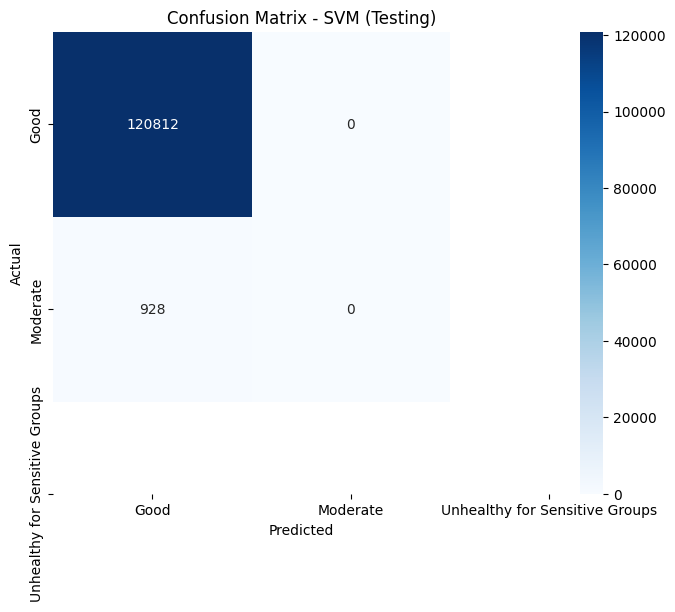

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
# Đặt các đặc trưng và biến mục tiêu
features = ['Year', 'Month', 'Day', 'O3 Mean', 'O3 1st Max Hour', 'CO Mean' , 'CO 1st Max Hour', 'SO2 Mean','SO2 1st Max Hour', 'NO2 Mean', 'NO2 1st Max Hour']
target = 'Air_Quality_State'

# Tách dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

# Tính thời gian chạy của thuật toán
start_time = time.time()

# Mô hình SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_test_pred = svm_model.predict(X_test)

# Kết thúc tính thời gian
end_time = time.time()

# Ma trận nhầm lẫn cho mô hình kiểm thử
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# In thời gian chạy và kết quả
print(f"Thời gian chạy của mô hình SVM là: {end_time - start_time} giây")
print("\nConfusion Matrix (Testing):")
print(conf_matrix_test)
print(f"Accuracy (Testing): {accuracy_test}")

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix - SVM (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()